In [2]:
import numpy as np
from matplotlib import pyplot as plt
# from scipy.special import softmax
from itertools import product
import numpy as np
# from utils import *
# from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### posterior functions

In [62]:
split_thresh = lambda l,a: ((l+0)/(S*l+0))*(a)

In [63]:
""" block tr41; schema0 (tactive = 40)
- S0 active trials 0-40
- posterior on step 0-2/3 (new schema obs)
"""
block_41_S0 = lambda l,b: ((l+0)/(S*l+40))*(b+40*tr*N) 

In [64]:
""" middle tr81; schema0 (tactive = 80)
- S0 active intrlv trials 0-80
  - 20A/20B intrlv, 40A block
- obs step 0-2/3 
"""
middle_81_S0 = lambda l,b: ((l+20)/(S*l+80))*(b+40*tr*N)

In [65]:
""" interleave tr02; schema0 (tactive = 1)
- obs step 0-2/3 
"""
int_2_S0 = lambda l,b: ((l+0)/(S*l+1))*(b+1*tr*N)

In [66]:
""" block tr02; schema0 (tactive = 1)
- obs step 0-2/3 
"""
block_2_S0 = lambda l,b: ((l+1)/(S*l+1))*(b+1*tr*N)

In [88]:
""" block tr02; schema0 (tactive = 1)
- history step 2: 
  - tr0 _ 3-5 
  - tr1 _ 2-4
"""
block_2_t2_S0 = lambda l,b: ((l+0)/(S*l+0))*(b+(1*tr*N)+(1*N))

In [89]:
block_81_S1 = lambda l:   ((l+40)/((S*l)+40))*(40*tr*N)
block_81_S2 = lambda l,b: ((l+0)/ ((S*l)+40))*(b+40*tr*N)
late_120 = lambda l,b: ((l+40)/(S*l+120))*(b+120*tr*N)

In [90]:
xplt_beta = np.arange(0,1000)
xplt_alpha = np.arange(0,1000)

### default params

In [91]:
lmda = 1
alpha = 60
beta = 76
S = 2
N = 1 # prior lrate
tr = 3 # transitions per trial

In [92]:
""" condition: tr02; interleaved splits; block stays
"""
print(int_2_S0(lmda,beta)<split_thresh(lmda,alpha),'-- intrlv split tr02')
print(block_2_S0(lmda,beta)>split_thresh(lmda,alpha),'-- block stays tr02t0')
print(block_2_t2_S0(lmda,beta)>split_thresh(lmda,alpha),'-- block stays tr02t2')
print(split_thresh(lmda,alpha),int_2_S0(lmda,beta),block_2_S0(lmda,beta),block_2_t2_S0(lmda,beta))

True -- intrlv split tr02
True -- block stays tr02t0
True -- block stays tr02t2
30.0 26.333333333333332 52.666666666666664 40.0


In [11]:
""" condition: middle tr81; middle splits
"""
# block split on 40
print(split_thresh(lmda,alpha) > block_41_S1(lmda,beta),'-- block split 40')
# middle split on 80
print()


False -- block split 40


### block split at 41

True

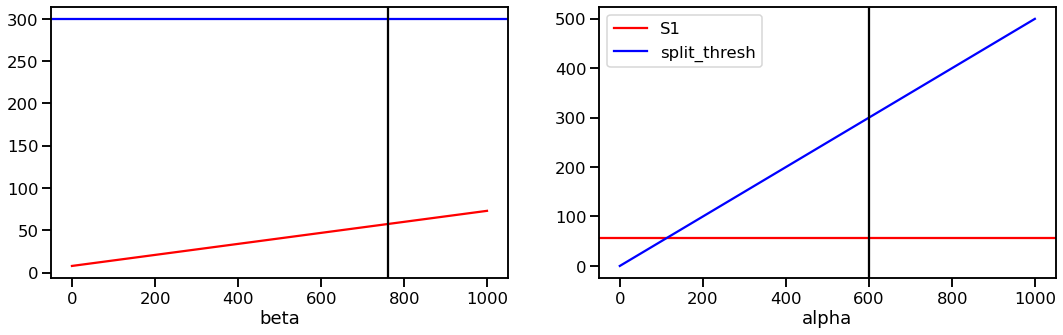

In [8]:
f,axar = plt.subplots(1,2,figsize=(18,5))
##
ax = axar[0]
ax.axhline(split_thresh(lmda,alpha),c='b',label='split_thresh')
ax.plot(block_41_S1(lmda,xplt_beta),c='r',label='S1')
ax.set_xlabel('beta')
ax.axvline(beta,c='k')
##
ax = axar[1]
ax.axhline(block_41_S1(lmda,beta),c='r',label='S1')
ax.plot(split_thresh(lmda,xplt_alpha),c='b',label='split_thresh')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
plt.legend()
block_41_S1(lmda,beta)<split_thresh(lmda,alpha)

### interleaved stay on trial 2

True

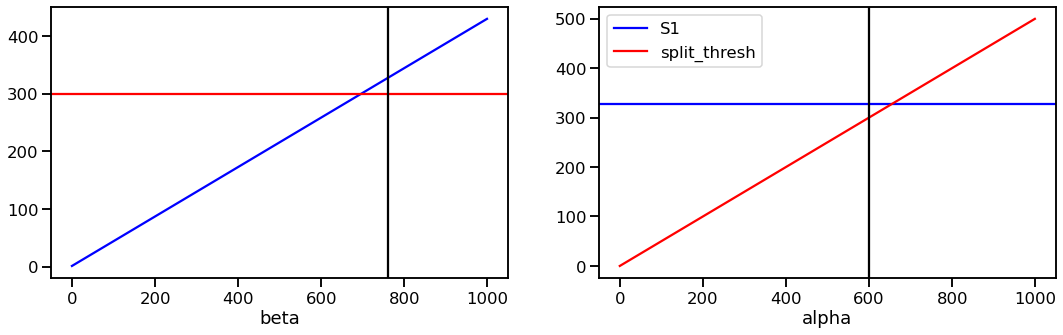

In [5]:
lmda=3
f,axar = plt.subplots(1,2,figsize=(18,5))
##
ax = axar[0]
ax.plot(int_S1(lmda,xplt_beta),c='b',label='S1')
ax.axhline(split_thresh(lmda,alpha),c='r',label='split_thresh')
ax.set_xlabel('beta')
ax.axvline(beta,c='k')
##
ax = axar[1]
ax.axhline(int_S1(lmda,beta),c='b',label='S1')
ax.plot(split_thresh(lmda,xplt_alpha),c='r',label='split_thresh')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
plt.legend()

cond = int_S1(lmda,beta)>split_thresh(lmda,alpha)
cond

### split middle trial 81 < S1

True

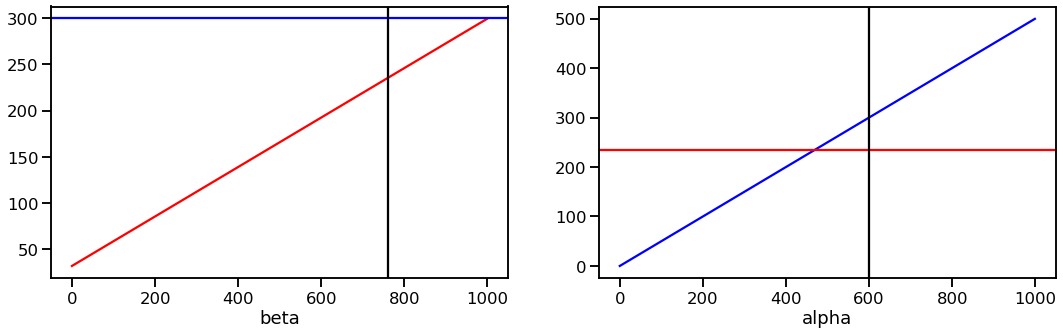

In [6]:
f,axar = plt.subplots(1,2,figsize=(18,5))
## 
ax = axar[0]
ax.plot(middle_81(lmda,xplt_beta),label='S1',c='r')
ax.axhline(split_thresh(lmda,alpha),label='split_thresh',c='b')
ax.axvline(beta,c='k')
ax.set_xlabel('beta')
##
ax = axar[1]
ax.plot(split_thresh(lmda,xplt_alpha),label='split_thresh',c='b')
ax.axhline(middle_81(lmda,beta),label='S1',c='r')
ax.set_xlabel('alpha')
ax.axvline(alpha,c='k')
## 
cond = middle_81(lmda,beta)<split_thresh(lmda,alpha)
cond

### split late

False

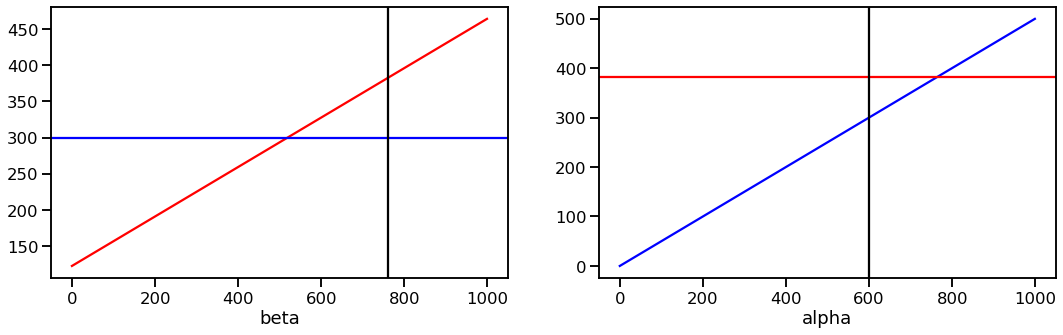

In [7]:
f,axar = plt.subplots(1,2,figsize=(18,5))
## 
ax = axar[0]
ax.plot(late_120(lmda,xplt_beta),label='S1',c='r')
ax.axhline(split_thresh(lmda,alpha),label='split_thresh',c='b')
ax.axvline(beta,c='k')
ax.set_xlabel('beta')
##
ax = axar[1]
ax.plot(split_thresh(lmda,xplt_alpha),label='split_thresh',c='b')
ax.axhline(late_120(lmda,beta),label='S1',c='r')
ax.axvline(alpha,c='k')
ax.set_xlabel('alpha')
## 
cond = late_120(lmda,beta)<split_thresh(lmda,alpha)
cond

### switch to S1 at blocked 80 S1>S2

True

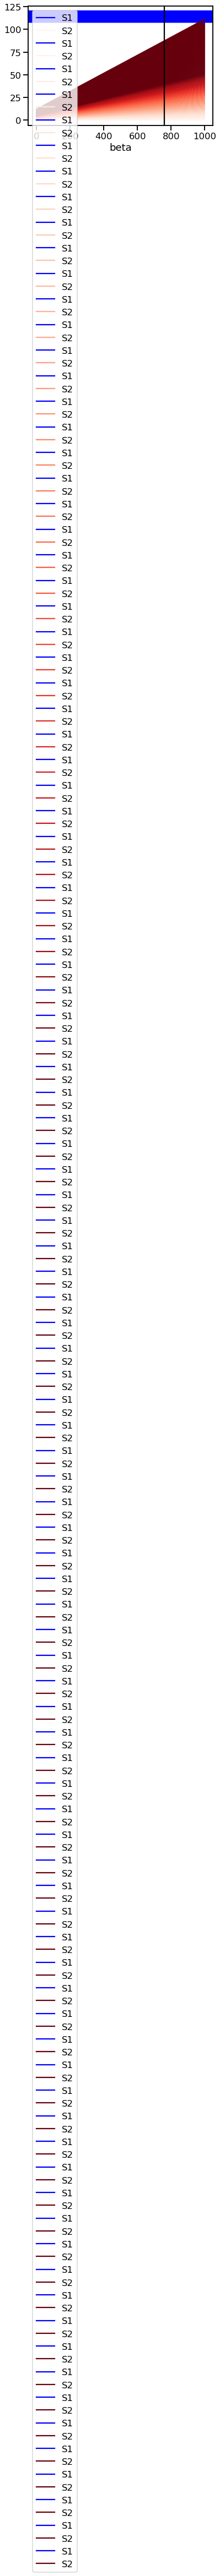

In [9]:

f,axar = plt.subplots(1,1)
ax=axar
for lmda in np.arange(0,5,0.05):
  ax.axhline(block_81_S1(lmda),c='b',label='S1')
  ax.plot(block_81_S2(lmda,xplt_beta),c=plt.get_cmap('Reds')(lmda/2),label='S2')
plt.legend()
ax.set_xlabel('beta')

ax.axvline(beta,c='k')
cond = block_81_S1(lmda)>block_81_S2(lmda,beta)
cond